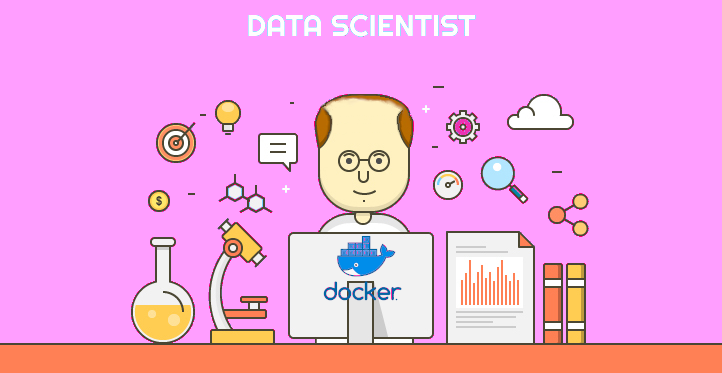

# Estatística Descritiva
É uma forma numérica de descrever os dados, dividida em 2 grupos:
* Descreve os valores das observações de uma variável, são elas: soma, mediana, média, máximo e mínimo.
* Descreve a dispersão de uma variável, são elas: desvio padrão, variância, contagens e quartis.

Usada para detecção de outliers, planejar os requisitos de preparação de dados para pré-processamento (como transformações e conversões) e na escolha de variáveis para o uso em Machine Learning.    

In [ ]:
import pandas as pd

caminho = 'bases/mtcars.csv'
carros = pd.read_csv(caminho)
carros.columns = ['nome', 'mpg', 'cil', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
carros.index = carros.nome
carros.head()

In [ ]:
# Somatório
carros.sum()

In [ ]:
carros.sum(axis=1)

In [ ]:
# Mediana
carros.median()

In [ ]:
# Média Aritmética
carros.mean()

In [ ]:
# Máximo
carros.max()

In [ ]:
# Para saber qual linha contém o valor máximo do mpg
carros['mpg'].idxmax()

In [ ]:
# Mínimo
carros.max()

In [ ]:
# Para saber qual linha contém o valor mínimo do mpg
carros['mpg'].idxmin()

### Dispersão de Variáveis

In [ ]:
# Desvio padrão
carros.std()

In [ ]:
# Variância
carros.var()

In [ ]:
# Contagem de Valores
carros['gear'].value_counts() # Qtd de Marchas

### Descritivo Estatístico

In [ ]:
carros.describe()

### Variáveis Categóricas
Assumem um limite fixo de valores possíveis e cada observação é atribuída a um subgrupo específico. São usadas para realizar uma Tabulação Cruzada (crosstab) que é uma funcionalidade que sumariza e combina 2 ou mais variáveis. Por padrão crosstab mostra a frequência de valores por variável.

In [ ]:
# Cilindros, tipo do câmbio manual ou automático, qtd marchas, qtd de carburadores
carros_cat = carros[['cil', 'am', 'gear', 'carb']]

In [ ]:
marchas_grupo = carros_cat.groupby('gear')
marchas_grupo.describe().T # T transforma as colunas em linhas

In [ ]:
# Transformando variáveis em dados categóricos
carros['grupo'] = pd.Series(carros['gear'], dtype='category')
carros.dtypes

In [ ]:
carros['grupo'].head()

In [ ]:
# Descrever dados categoricos com Crosstabs
pd.crosstab(carros['am'], carros['gear'])

### Correlações
Correlação não implica em causalidade! Por exemplo existe uma correlação entre o tamanho do supermercado e a taxa de obesidade, quanto maior o tamanho do supermercado maior a taxa de obesidade, uma coisa não implica na outra e é possível quantificar essa correlação usando o Método de Pearson. 

**Métodos Paramétricos** serve para identificar correlações entre variáveis numéricas linearmente relacionadas. O coeficiente de Pearson pode variar entre:
* R = 1, Relação positivamente forte
* R = 0, Não linearmente correlacionados
* R = -1, Relação negativamente forte

Pressupostos que os dados devem seguir para que o método faça sentido são:
* Os dados devem possuir uma distribuição normal
* Precisam ser contínuas e numéricas
* Precisam apresentar uma relação linear

In [ ]:
# Calcular o coeficiente de Pearson
from scipy.stats.stats import pearsonr
import seaborn as sns

%matplotlib inline

# Correlação de Pearson
X = carros[['mpg', 'hp', 'wt', 'qsec']]
sns.pairplot(X) # observar que os dados apresentam distribuição normal

In [ ]:
# Usar o scipy para calcular o coeficiente de Pearson
mpg = carros['mpg']
hp = carros['hp']
qsec = carros['qsec']
wt = carros['wt']

coef_pearson, p_valor = pearsonr(mpg, hp)
print('Coeficiente de Pearson entre MPG e HP {:0.3}'.format(coef_pearson))

coef_pearson, p_valor = pearsonr(mpg, wt)
print('Coeficiente de Pearson entre MPG e WT {:0.3}'.format(coef_pearson))

coef_pearson, p_valor = pearsonr(mpg, qsec)
print('Coeficiente de Pearson entre MPG e QSec {:0.3}'.format(coef_pearson))

In [ ]:
# Usar o Pandas para calcular o coeficiente de Pearson
corr = X.corr()
corr

In [ ]:
# Visualizar o coeficiente de Pearson com Seaborn
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

### Métodos não paramétricos
Encontrar correlação entre dados categóricos relacionados não linearmente, utilizamos para isso o método de Spearman e Tabela Qui-quadrado. **Spearman** usa pares de variáveis com dados ordinais. Pares podem ser ordenados de acordo com a força de correlação entre eles (a tabela é exatamente igual a de Pearson). **Qui-quadrado** é usado para teste de independência das variáveis, a hipótese nula é que de fato as variáveis são independentes, os possíveis valores são:
* p < 0.05 - Rejeitamos a hipótese nula e concluímos que as variáveis são correlacionadas
* p > 0.05 - Aceitamos a hipótese nula e concluímos que as variáveis são independentes

In [ ]:
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

In [ ]:
# Correlação de Spearman
# qtd cilíndros, formato do motor, tipo do câmbio e qtd marchas
X = carros[['cil', 'vs', 'am', 'gear']]
sns.pairplot(X) # observar que os dados não apresentam distribuição normal

In [ ]:
cil = carros['cil']
vs = carros['vs']
am = carros['am']
gear = carros['gear']

coef_spearman, p_valor = spearmanr(cil, vs)
print('Coeficiente de Spearman entre Cil e VS {:0.3}'.format(coef_spearman))

coef_spearman, p_valor = spearmanr(cil, am)
print('Coeficiente de Spearman entre Cil e AM {:0.3}'.format(coef_spearman))

coef_spearman, p_valor = spearmanr(cil, gear)
print('Coeficiente de Spearman entre Cil e GEAR {:0.3}'.format(coef_spearman))


In [ ]:
# Qui-quadrado
tab = pd.crosstab(cil, vs)
chi2, p, dof, exp = chi2_contingency(tab.values)
print('Qui-quadrado entre Cil e VS {:0.3} e p-valor {:0.3}'.format(chi2, p))

tab = pd.crosstab(cil, am)
chi2, p, dof, exp = chi2_contingency(tab.values)
print('Qui-quadrado entre Cil e AM {:0.3} e p-valor {:0.3}'.format(chi2, p))


tab = pd.crosstab(cil, gear)
chi2, p, dof, exp = chi2_contingency(tab.values)
print('Qui-quadrado entre Cil e GEAR {:0.3} e p-valor {:0.3}'.format(chi2, p))

### Colocar dados em escala
Usado para prevenir grandezas diferentes entre as variáveis que produzam estatísticas erradas ou que induzam ao erro ou para preparar os dados para ML. Existem duas maneira para isso:
* Normalização - colocar cada observação numa escala relativa entre 0 e 1.
* Padronização - ajustar os dados para que tenham média zero e variância igual a 1.

In [ ]:
from matplotlib import pyplot as plt

# Pré-processamento com Scikit-Learn
from sklearn import preprocessing

In [ ]:
# Vejamos a variância dessa variável
plt.plot(mpg)

In [ ]:
# Normalização
mpg_mat = mpg.values.reshape(-1, 1) # -1 todas as linhas
scaler = preprocessing.MinMaxScaler()
scaled_mpg = scaler.fit_transform(mpg_mat)
plt.plot(scaled_mpg) # observar o eixo Y

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,10))
scaled_mpg = scaler.fit_transform(mpg_mat)
plt.plot(scaled_mpg) # observar o eixo Y

In [ ]:
# Padronização
mpg_nao_padronizado = preprocessing.scale(mpg, axis=0, with_mean=False, with_std=False)
plt.plot(mpg_nao_padronizado)

In [ ]:
mpg_padronizado = preprocessing.scale(mpg)
plt.plot(mpg_padronizado)